## Observations and Insights 

1. From the table below, these regimens are getting better performance than the reference group:
* Capomulin
* Ceftamin
* Infubinol
* Propriva
* Ramicane

2. According to Bar and Pie Charts, each regimen has around **23 to 25** different mice tested. And ``49.04%`` of mice are female.

3. From Quartiles, Outliers and Boxplots report, four regimens with best performance were analyzed: ``Capomulin, Ramicane, Infubinol, and Ceftamin``. With the statistical calculations, only one outlier in Infubinol regimen was found:
* Mouse ID: ``c326``
* Tumor Volume (mm3): ``36.32``

4. The box plotting also confirms the previous conclusion. The final tumor volumes vary from 20 to 70 mm3.

5. From Line and Scatter Plots, The mouse was used to plot is s185. From the chart, **the tumor volume decreases as the time goes in a linear way**, changing from 45 mm3 to around 23 mm3.

6. A linear regression model was applied on the scatter chart. The correlation coefficient is 0.84194, which means it behaves a **strong correlation** between the *mouse weight and average tumor volume* (0.7~0.9).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_num = mouse_df["Mouse ID"].unique()
len(mouse_num)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_df[mouse_df[["Mouse ID", "Timepoint"]].duplicated()][["Mouse ID", "Timepoint"]]

# Get the list of duplicated mouse by its ID
duplicate_list = duplicate_mouse["Mouse ID"].unique()
print(duplicate_list)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df[mouse_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unwanted_filter = mouse_df["Mouse ID"] != "g989"
cleaned_df = mouse_df[unwanted_filter]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Get groupby object with Tumer Volume column
grouped_mouse = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Calculate statistical properties of each regimen group
tumer_mean = grouped_mouse.mean()
tumer_median = grouped_mouse.median()
tumer_var = grouped_mouse.var()
tumer_std = grouped_mouse.std()
tumer_sem = grouped_mouse.sem()

# Create a dictionary for the Dataframe coversion
summary_dict = {
    "Mean": tumer_mean,
    "Median": tumer_median,
    "Variance": tumer_var,
    "Standard Deviation": tumer_std,
    "SEM": tumer_sem
}

# Convert the dict to dataframe with regimen as index
regimen_summary = pd.DataFrame(summary_dict)

regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create a list with all required statistical properties
agg_list = ['mean', 'median', 'var', 'std', 'sem']

# Prepare for columns rename
rename_columns={
    "mean": "Mean",
    "meian": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"}

# Using the aggregation method, produce the same summary statistics in a single line
grouped_mouse_2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(agg_list).rename(columns = rename_columns)

grouped_mouse_2


,Mean,median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mouse Tested')

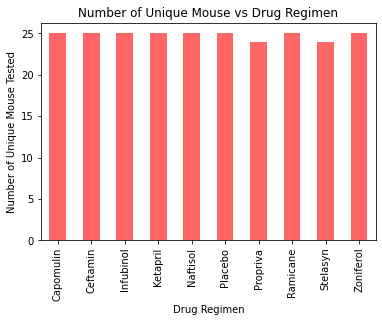

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

grouped_mouse_id = cleaned_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_bar = grouped_mouse_id.plot(kind = "bar", facecolor = "red", alpha = 0.6)
mouse_bar.set_title("Number of Unique Mouse vs Drug Regimen")
mouse_bar.set_ylabel("Number of Unique Mouse Tested")

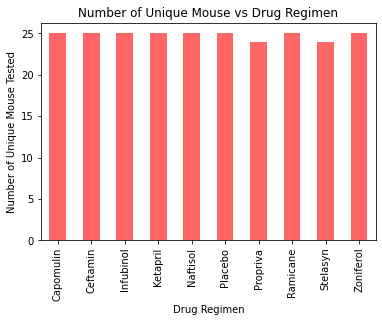

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create lists for x_asix and labels
x_axis = [i for i in range(10)]
labels = [name for name in grouped_mouse_id.index]

# Plot bar chart with change of xticks and other design elements
plt.bar(x_axis, grouped_mouse_id, width = 0.5, color = "r", alpha = 0.6, align = "center")
plt.xticks(x_axis, labels, rotation = 90)
plt.title("Number of Unique Mouse vs Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mouse Tested")
plt.xlim(-0.5, len(x_axis) - 0.5)
plt.show()


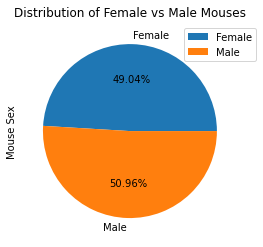

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by the mouse sex
grouped_mouse_sex = cleaned_df.groupby("Sex")["Mouse ID"].count()

# Plot by pie chart and set up design using pandas
mouse_pie = grouped_mouse_sex.plot(
    kind = "pie", 
    autopct = "%1.2f%%", 
    legend = True)
mouse_pie.set_title("Distribution of Female vs Male Mouses")
mouse_pie.set_ylabel("Mouse Sex")
mouse_pie.legend(loc = (0.75, 0.82))

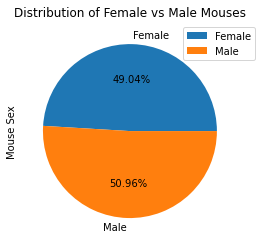

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot by pie chart and set up design using pyplot
plt.pie(grouped_mouse_sex, labels = grouped_mouse_sex.index, 
        autopct = "%1.2f%%")
plt.title("Distribution of Female vs Male Mouses")
plt.ylabel("Mouse Sex")
plt.legend(bbox_to_anchor=(0.6, 0, 0.5, 1))
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of required treatment regimens, and filter df rows with this list
required_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_df = mouse_df[mouse_df["Drug Regimen"].isin(required_treatments)]

# Start by getting the last (greatest) timepoint for each mouse 
# Get the max value of each grouped mouse timepoint as the last timepoint
last_tp = treatment_df.groupby("Mouse ID")["Timepoint"].max()
last_tp.rename("Last Timepoint", inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tp_merged_df = pd.merge(treatment_df, last_tp, on = "Mouse ID", how = "outer")

# Filter the df to get only the last timepoint
last_tp_filter = (tp_merged_df["Timepoint"] == tp_merged_df["Last Timepoint"])
last_tp_df = tp_merged_df[last_tp_filter].reset_index(drop = True)
last_tp_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# A list of required treatments was already created in the previous cell:
required_treatments

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in required_treatments:
    # add subset     
    subset = last_tp_df[last_tp_df["Drug Regimen"] == treatment]
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5*iqr)

    # Determine outliers using upper and lower bounds, print out outliers
    outliers_filter = ((subset["Tumor Volume (mm3)"] >= upper_bound) | (subset["Tumor Volume (mm3)"] <= lower_bound))
    outliers = subset.loc[outliers_filter, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
    print(f"=========== Outlier result for {treatment} ===========")
    print(outliers)

=========== Outlier result for Capomulin ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
=========== Outlier result for Ramicane ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
=========== Outlier result for Infubinol ===========
   Mouse ID  Timepoint  Tumor Volume (mm3)
58     c326          5           36.321346
=========== Outlier result for Ceftamin ===========
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []


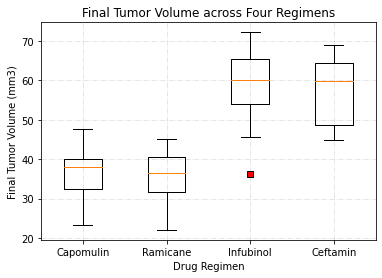

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a empty dict with all four regimens and their empty lists for values
tumer_vol = {
    "Capomulin": [], 
    "Ramicane": [], 
    "Infubinol": [], 
    "Ceftamin": []
}

# Loop through four treatments in the list
for treatment in required_treatments:
    # Loop all rows in the original df
    for i in last_tp_df.index:
        # Append the required tumer volume to the responding dict[list]
        if last_tp_df.iloc[i]["Drug Regimen"] == treatment:
            tumer_vol[treatment].append(last_tp_df.iloc[i]["Tumor Volume (mm3)"])

# Plot the box chart with the previous dict's keys as label name, values as chart data
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.boxplot(tumer_vol.values(), flierprops=red_square)
ax.set_xticklabels(tumer_vol.keys())
ax.set_title('Final Tumor Volume across Four Regimens')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()


## Line and Scatter Plots

The mouse was used to plot is s185


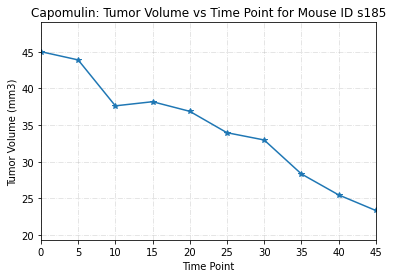

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = treatment_df[treatment_df["Drug Regimen"] == "Capomulin"]

# Get the list of mice treated with Capomulin, and pick the first mouse
capo_mouse_id = capo_df["Mouse ID"].unique()
print(f"The mouse was used to plot is {capo_mouse_id[0]}")

# Loc the rows with Mouse ID s185 then plot the line chart
capo_mouse = capo_df.loc[capo_df["Mouse ID"] == capo_mouse_id[0]]
x_timepoint = capo_mouse["Timepoint"]
y_tumor_vol = capo_mouse["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_vol, marker = "*")

# Some plot design tweaks
plt.title("Capomulin: Tumor Volume vs Time Point for Mouse ID " + capo_mouse_id[0])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(min(x_timepoint), max(x_timepoint))
plt.ylim(min(y_tumor_vol) - 4, max(y_tumor_vol) + 4)
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()

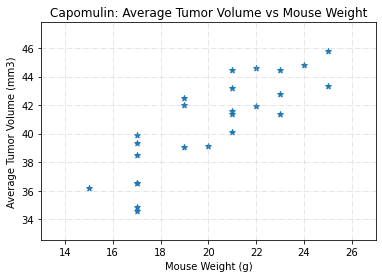

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Grouped by Mouse ID and calculate the mean for both weight and tumor volume
capo_df_avg = capo_df.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
x_weight = capo_df_avg["Weight (g)"]
y_avg_tvol = capo_df_avg["Tumor Volume (mm3)"]
plt.scatter(x_weight, y_avg_tvol, marker = "*")

# Some plot design tweaks
plt.title("Capomulin: Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(x_weight) - 2, max(x_weight) + 2)
plt.ylim(min(y_avg_tvol) - 2, max(y_avg_tvol) + 2)
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()

## Correlation and Regression

The correlation coefficient is: 0.8419363


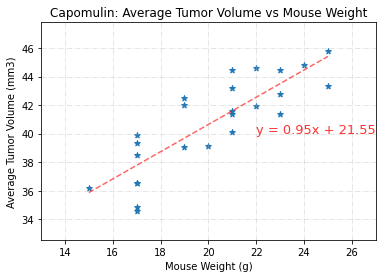

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Use the previous x and y axes data to calculate the correlation r value
# Linear regression model building and its equation
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_weight, y_avg_tvol)
eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The correlation coefficient is: {round(rvalue, 7)}")

# Build regression line (y = mx + b)
regress_line = slope * x_weight + intercept

# To avoid overlapped dashed line for all mice, only two mice were used to plot the line (min to max)
plt.plot([min(x_weight), max(x_weight)], [min(regress_line), max(regress_line)], "r--", alpha = 0.6)

# Copy the previous scatter plot, annotate the equation
plt.scatter(x_weight, y_avg_tvol, marker = "*")
plt.title("Capomulin: Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(x_weight) - 2, max(x_weight) + 2)
plt.ylim(min(y_avg_tvol) - 2, max(y_avg_tvol) + 2)
plt.annotate(eq, (22, 40), fontsize=13, color='r', alpha = 0.8)
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()